# Active Product Sales Analysis 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Order_details=pd.read_csv(r"C:\Users\devma\OneDrive\Desktop\Data_Set.xlx\Datasets\Order_details(masked).csv")


In [ ]:
# Problem statment :- To find the busiest time (hour) of the day.

In [2]:
Order_details.head()

,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46


In [3]:
Order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              581 non-null    object
 1   Email             581 non-null    object
 2   Product           581 non-null    object
 3   Transaction Date  581 non-null    object
dtypes: object(4)
memory usage: 18.3+ KB


In [12]:
# As our problem statement to find the busiest time, we just need the Transactional Hour 

#Convert the format of the column Transaction Hour to using datetime
Order_details['Time']=pd.to_datetime(Order_details['Transaction Date'])

#then we will extract the hour from the the column and store it in the new hour column
Order_details['Hour'] = (Order_details['Time']).dt.hour

In [24]:
#To extract the unique hours and convert them list
timemost1=Order_details['Hour'].value_counts().index.tolist()[:24]

#To get the frequencies and convert them to list
timemost2=Order_details['Hour'].value_counts().values.tolist()[:24]


In [16]:
#Column stacking them 
tmost=np.column_stack((timemost1,timemost2))
print(" Hour of Day"+"\t"+"Cumulative number of purchases \n")
print("\n".join('\t\t'.join(map(str,row))for row in tmost))


 Hour of Day	Cumulative number of purchases 

23		51
12		51
22		45
19		42
21		41
15		41
20		39
11		37
13		33
18		33
16		29
14		28
17		27
10		24
0		17
9		14
8		10
7		6
1		4
2		3
5		3
6		2
3		1


In [37]:
#Fine tuning the details
timemost=Order_details['Hour'].value_counts()

timemost1=[]

for i in range(0,23):
    timemost1.append(i)
    
timemost2=timemost.sort_index()

timemost2.tolist()
timemost2=pd.DataFrame(timemost2)

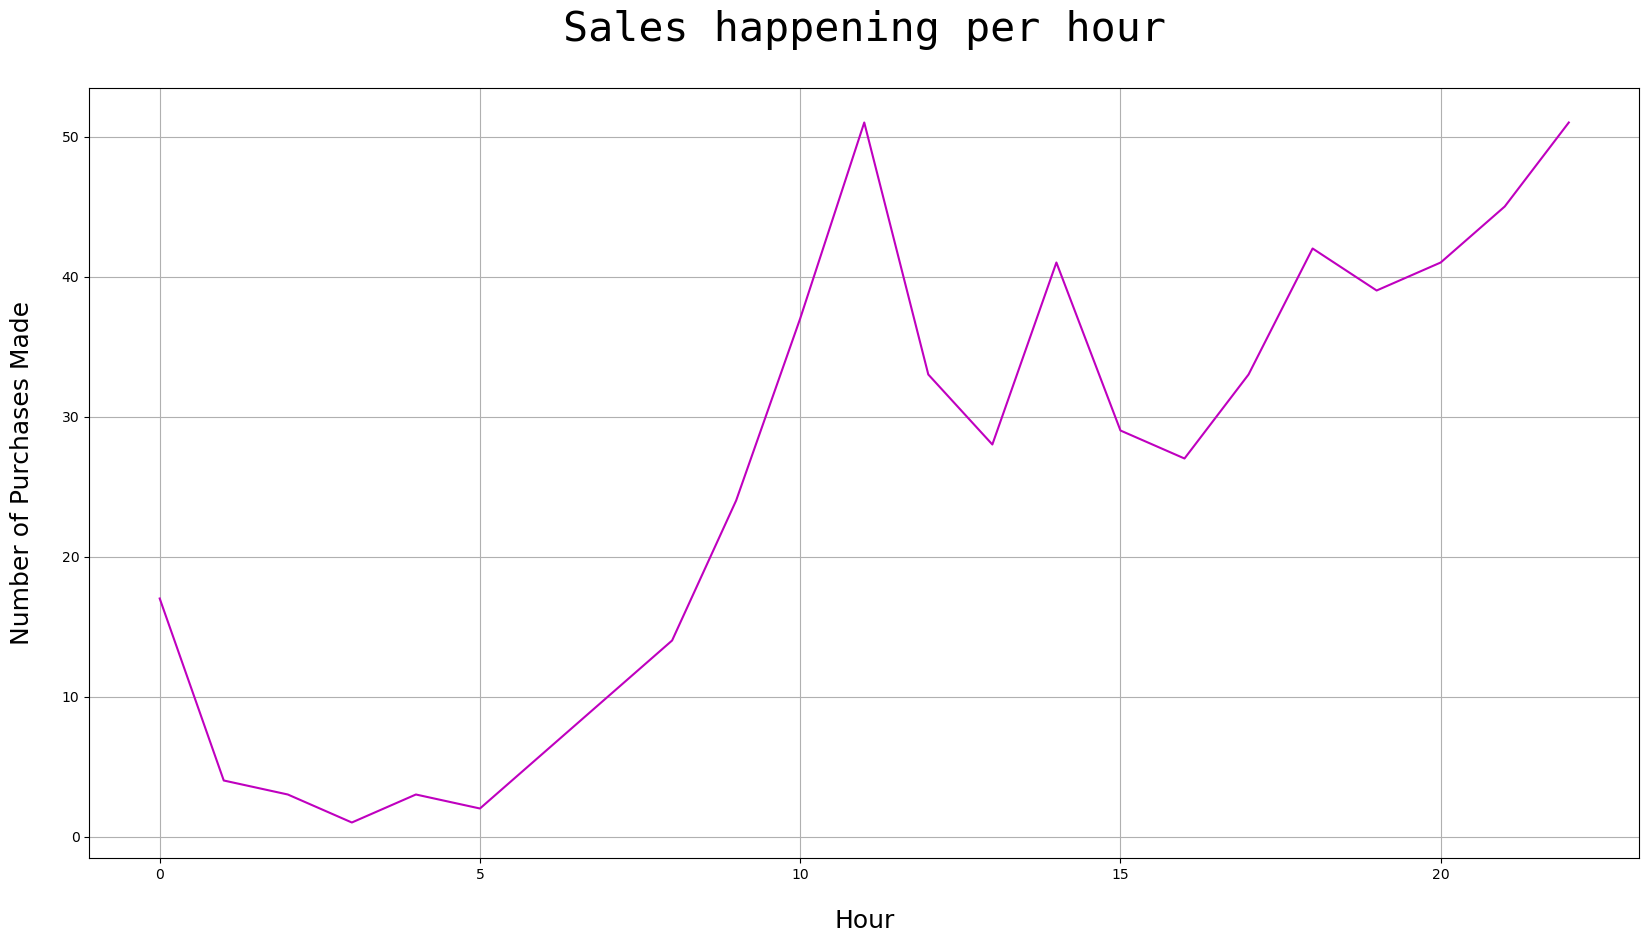

In [38]:
#Visualizations
plt.figure(figsize=(20,10))

plt.title('Sales happening per hour',
         fontdict={'fontname':'monospace','fontsize':30},y=1.05)

plt.ylabel("Number of Purchases Made",fontsize=18,labelpad=20)
plt.xlabel("Hour",fontsize=18,labelpad=20)
plt.plot(timemost1,timemost2,color='m')
plt.grid()
plt.show()